**PROGRAMMING FOR DATA SCIENCE:** Final Project

**Name:** Letizia

**Surname:** Lanza

**ID:** VR502321

**PART 1: Data Exploration and Data Wrangling**

**1. Explore the dataset:** your first task is to explore the data as seen in class, finding correlations between attributes and finding some interesting aspects that justify the next parts of the analysis.

*ATTENTION:* the topic of correlation between variables will be implemented at the end of point 3 (show some interesting plots).

The chosen dataset is available at the following Kaggle's link: https://www.kaggle.com/datasets/adarshde/electric-vehicle-population-dataset/data. 

The dataset is about the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL) and on the roads of The United States of America. (Updated: 22/06/2024)

In [78]:
#import libraries

import os 
import zipfile
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [79]:
zip_file_path = 'Electric_Vehicle_Population_Data.csv.zip'  #specify the path to the ZIP file

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:  #open the ZIP file and extract the CSV file inside it
    zip_ref.extract('Electric_Vehicle_Population_Data.csv', '.')  #extract the file to the current directory

electric_vehicles = pd.read_csv('Electric_Vehicle_Population_Data.csv')  #load the extracted CSV file into a pandas dataframe 
electric_vehicles


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191402,5YJ3E1EA0K,Pierce,Sumner,WA,98390.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,31.0,314927896,POINT (-122.2337855 47.2055969),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191403,JN1BF0BA7P,Pierce,Wilkeson,WA,98396.0,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,236213120,POINT (-122.0478543 47.1075591),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191404,7SAYGDEE4R,King,Fall City,WA,98024.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,261335896,POINT (-121.903093 47.567116),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
191405,7SAXCBE65N,Grays Harbor,Aberdeen,WA,98520.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,219273491,POINT (-123.807422 46.978243),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10


In [80]:
electric_vehicles = electric_vehicles.drop(['VIN (1-10)', 'Postal Code', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract'], axis = 1)  #drop specified columns from the dataframe
electric_vehicles

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
0,King,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Yakima,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,PACIFICORP
2,King,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Snohomish,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,PUGET SOUND ENERGY INC
4,Yakima,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,PACIFICORP
...,...,...,...,...,...,...,...,...,...,...
191402,Pierce,Sumner,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191403,Pierce,Wilkeson,WA,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191404,King,Fall City,WA,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191405,Grays Harbor,Aberdeen,WA,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...


In [81]:
electric_vehicles.info(verbose = True, show_counts = True)  #display detailed information about the dataframe, including column, non-null count and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 10 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   County                                             191403 non-null  object
 1   City                                               191403 non-null  object
 2   State                                              191407 non-null  object
 3   Model Year                                         191407 non-null  int64 
 4   Make                                               191407 non-null  object
 5   Model                                              191407 non-null  object
 6   Electric Vehicle Type                              191407 non-null  object
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  191407 non-null  object
 8   Electric Range                                     191407 non-null  int64 
 9   Elec

In [82]:
electric_vehicles.describe()  #generate descriptive statistics for the dataframe 

,Model Year,Electric Range
count,191407.000000,191407.000000
mean,2020.732335,55.657442
std,2.990487,90.151930
min,1997.000000,0.000000
25%,2019.000000,0.000000
50%,2022.000000,0.000000
75%,2023.000000,72.000000
max,2025.000000,337.000000


In [83]:
electric_vehicles.describe().T  #generate descriptive statistics for the dataframe and transpose the result for better readability

,count,mean,std,min,25%,50%,75%,max
Model Year,191407.0,2020.732335,2.990487,1997.0,2019.0,2022.0,2023.0,2025.0
Electric Range,191407.0,55.657442,90.151930,0.0,0.0,0.0,72.0,337.0


In the specific case of this dataset, since there are many more categorical variables than numeric variables, using the *.describe()* function does not provide as much interesting detail.

In [84]:
electric_vehicles.head()  #display the first 5 rows of the dataframe 

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
0,King,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Yakima,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,PACIFICORP
2,King,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Snohomish,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,PUGET SOUND ENERGY INC
4,Yakima,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,PACIFICORP


In [85]:
electric_vehicles.tail()  #display the last 5 rows of the dataframe 

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
191402,Pierce,Sumner,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191403,Pierce,Wilkeson,WA,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191404,King,Fall City,WA,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191405,Grays Harbor,Aberdeen,WA,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...
191406,Benton,Richland,WA,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...


In [86]:
electric_vehicles.columns  #display the names of all columns in the dataframe 

Index(['County', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Electric Utility'],
      dtype='object')

**2. Clean up the dataset:** this step encompasses the replacement of null values with appropriate data or their outright removal. During this step you are encouraged to modify the data according to the consideration matured during the exploration.

In [87]:
electric_vehicles.isnull()  #create a dataframe indicating which entries in the original dataframe are null (True) or not null (False)

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
191402,False,False,False,False,False,False,False,False,False,False
191403,False,False,False,False,False,False,False,False,False,False
191404,False,False,False,False,False,False,False,False,False,False
191405,False,False,False,False,False,False,False,False,False,False


In [88]:
electric_vehicles.isnull().sum()  #calculate the number of missing (null) values for each column in the dataframe 

County                                               4
City                                                 4
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Electric Utility                                     4
dtype: int64

In this case, since the 'County', 'City' and 'Electric Utility' columns contain categorical variables and not numeric variables, it would not be correct to replace missing values with mathematical operations such as mode or median.

In [89]:
electric_vehicles = electric_vehicles.dropna()  #remove rows with any missing (null) values from the dataframe
electric_vehicles

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
0,King,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Yakima,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,PACIFICORP
2,King,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Snohomish,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,PUGET SOUND ENERGY INC
4,Yakima,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,PACIFICORP
...,...,...,...,...,...,...,...,...,...,...
191402,Pierce,Sumner,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191403,Pierce,Wilkeson,WA,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191404,King,Fall City,WA,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191405,Grays Harbor,Aberdeen,WA,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...


In [90]:
electric_vehicles.isnull().sum()  #to check if the previous code worked correctly

County                                               0
City                                                 0
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Electric Utility                                     0
dtype: int64

In [91]:
electric_vehicles.shape  #display the number of rows and columns in the dataframe 

(191403, 10)

**3. Show some interesting plots:** an essential skill of a data scientist is being able to show the important information by using easily understandable graphs. Use the libraries introduced in class to show case some interesting aspects of the dataset. An additional 2 points can be awarded for code cleanliness.

In [92]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.cm as cm

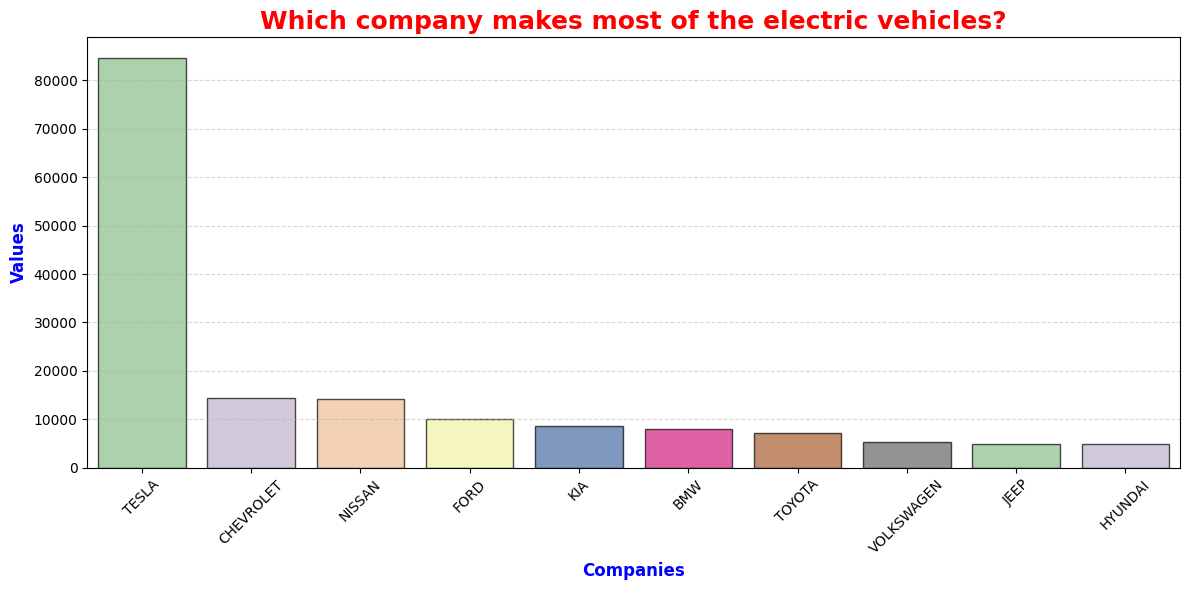

TESLA: 84667
CHEVROLET: 14320
NISSAN: 14239
FORD: 10048
KIA: 8671
BMW: 7993
TOYOTA: 7181
VOLKSWAGEN: 5408
JEEP: 4996
HYUNDAI: 4977


In [93]:
#group by 'Make', count occurrences, sort by 'City' in descending order 
vehicles_counts_by_name = electric_vehicles.groupby('Make').count().sort_values(by = 'City', ascending = False)
companies = vehicles_counts_by_name.index
values = vehicles_counts_by_name['City'].values

#select just the top 10 companies 
top_companies = companies[:10]
top_values = values[:10]

#plot the 10 companies
plt.figure(figsize = (12, 6))
sns.barplot(x = top_companies, y = top_values, edgecolor = 'black', linewidth = 1, alpha = 0.7, palette = 'Accent', hue = list(companies)[:10], dodge = False, legend = False)
plt.xlabel('Companies', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.ylabel('Values', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.title('Which company makes most of the electric vehicles?', fontsize = 18, fontweight = 'bold', color = 'red')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

#print top 10 companies and their values 
for i in range(10):
    print(f"{companies[i]}: {values[i]}")

*DISCLAIMER:* it is assumed that the most built and/or registered car models are at the same time the best selling models.

In [94]:
#for each top 10 company, find and print the top selling model and its count
for company in top_companies:
    company_data = electric_vehicles[electric_vehicles['Make'] == company]
    model_sales_counts = company_data.groupby('Model').size().sort_values(ascending = False)
    top_selling_model = model_sales_counts.index[0]
    top_selling_model_count = model_sales_counts.iloc[0]
    print(f'The top selling model for {company} is {top_selling_model} with {top_selling_model_count} units sold')

The top selling model for TESLA is MODEL Y with 39521 units sold
The top selling model for CHEVROLET is BOLT EV with 6444 units sold
The top selling model for NISSAN is LEAF with 13439 units sold
The top selling model for FORD is MUSTANG MACH-E with 3758 units sold
The top selling model for KIA is NIRO with 3358 units sold
The top selling model for BMW is X5 with 2456 units sold
The top selling model for TOYOTA is PRIUS PRIME with 2985 units sold
The top selling model for VOLKSWAGEN is ID.4 with 4337 units sold
The top selling model for JEEP is WRANGLER with 3743 units sold
The top selling model for HYUNDAI is IONIQ 5 with 2747 units sold


In [95]:
for company in top_companies:
    company_data = electric_vehicles[electric_vehicles['Make'] == company]
    total_sales = company_data.shape[0]
    model_sales_counts = company_data.groupby('Model').size().sort_values(ascending = False)
    top_selling_model = model_sales_counts.index[0]
    top_selling_model_count = model_sales_counts.iloc[0]
    
    
    top_model_percentage = (top_selling_model_count / total_sales) * 100  #calculate the percentage of the top-selling model relative to total sales
    print(f'For {company}, the percentage of sales for the top-selling model, {top_selling_model}, is {top_model_percentage:.2f}% of the company\'s total sales')

For TESLA, the percentage of sales for the top-selling model, MODEL Y, is 46.68% of the company's total sales
For CHEVROLET, the percentage of sales for the top-selling model, BOLT EV, is 45.00% of the company's total sales
For NISSAN, the percentage of sales for the top-selling model, LEAF, is 94.38% of the company's total sales
For FORD, the percentage of sales for the top-selling model, MUSTANG MACH-E, is 37.40% of the company's total sales
For KIA, the percentage of sales for the top-selling model, NIRO, is 38.73% of the company's total sales
For BMW, the percentage of sales for the top-selling model, X5, is 30.73% of the company's total sales
For TOYOTA, the percentage of sales for the top-selling model, PRIUS PRIME, is 41.57% of the company's total sales
For VOLKSWAGEN, the percentage of sales for the top-selling model, ID.4, is 80.20% of the company's total sales
For JEEP, the percentage of sales for the top-selling model, WRANGLER, is 74.92% of the company's total sales
For HYU

/var/folders/nt/j3zdw65j5ys5rx0l1vhss5y40000gn/T/ipykernel_1302/2688268637.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_companies * 2)


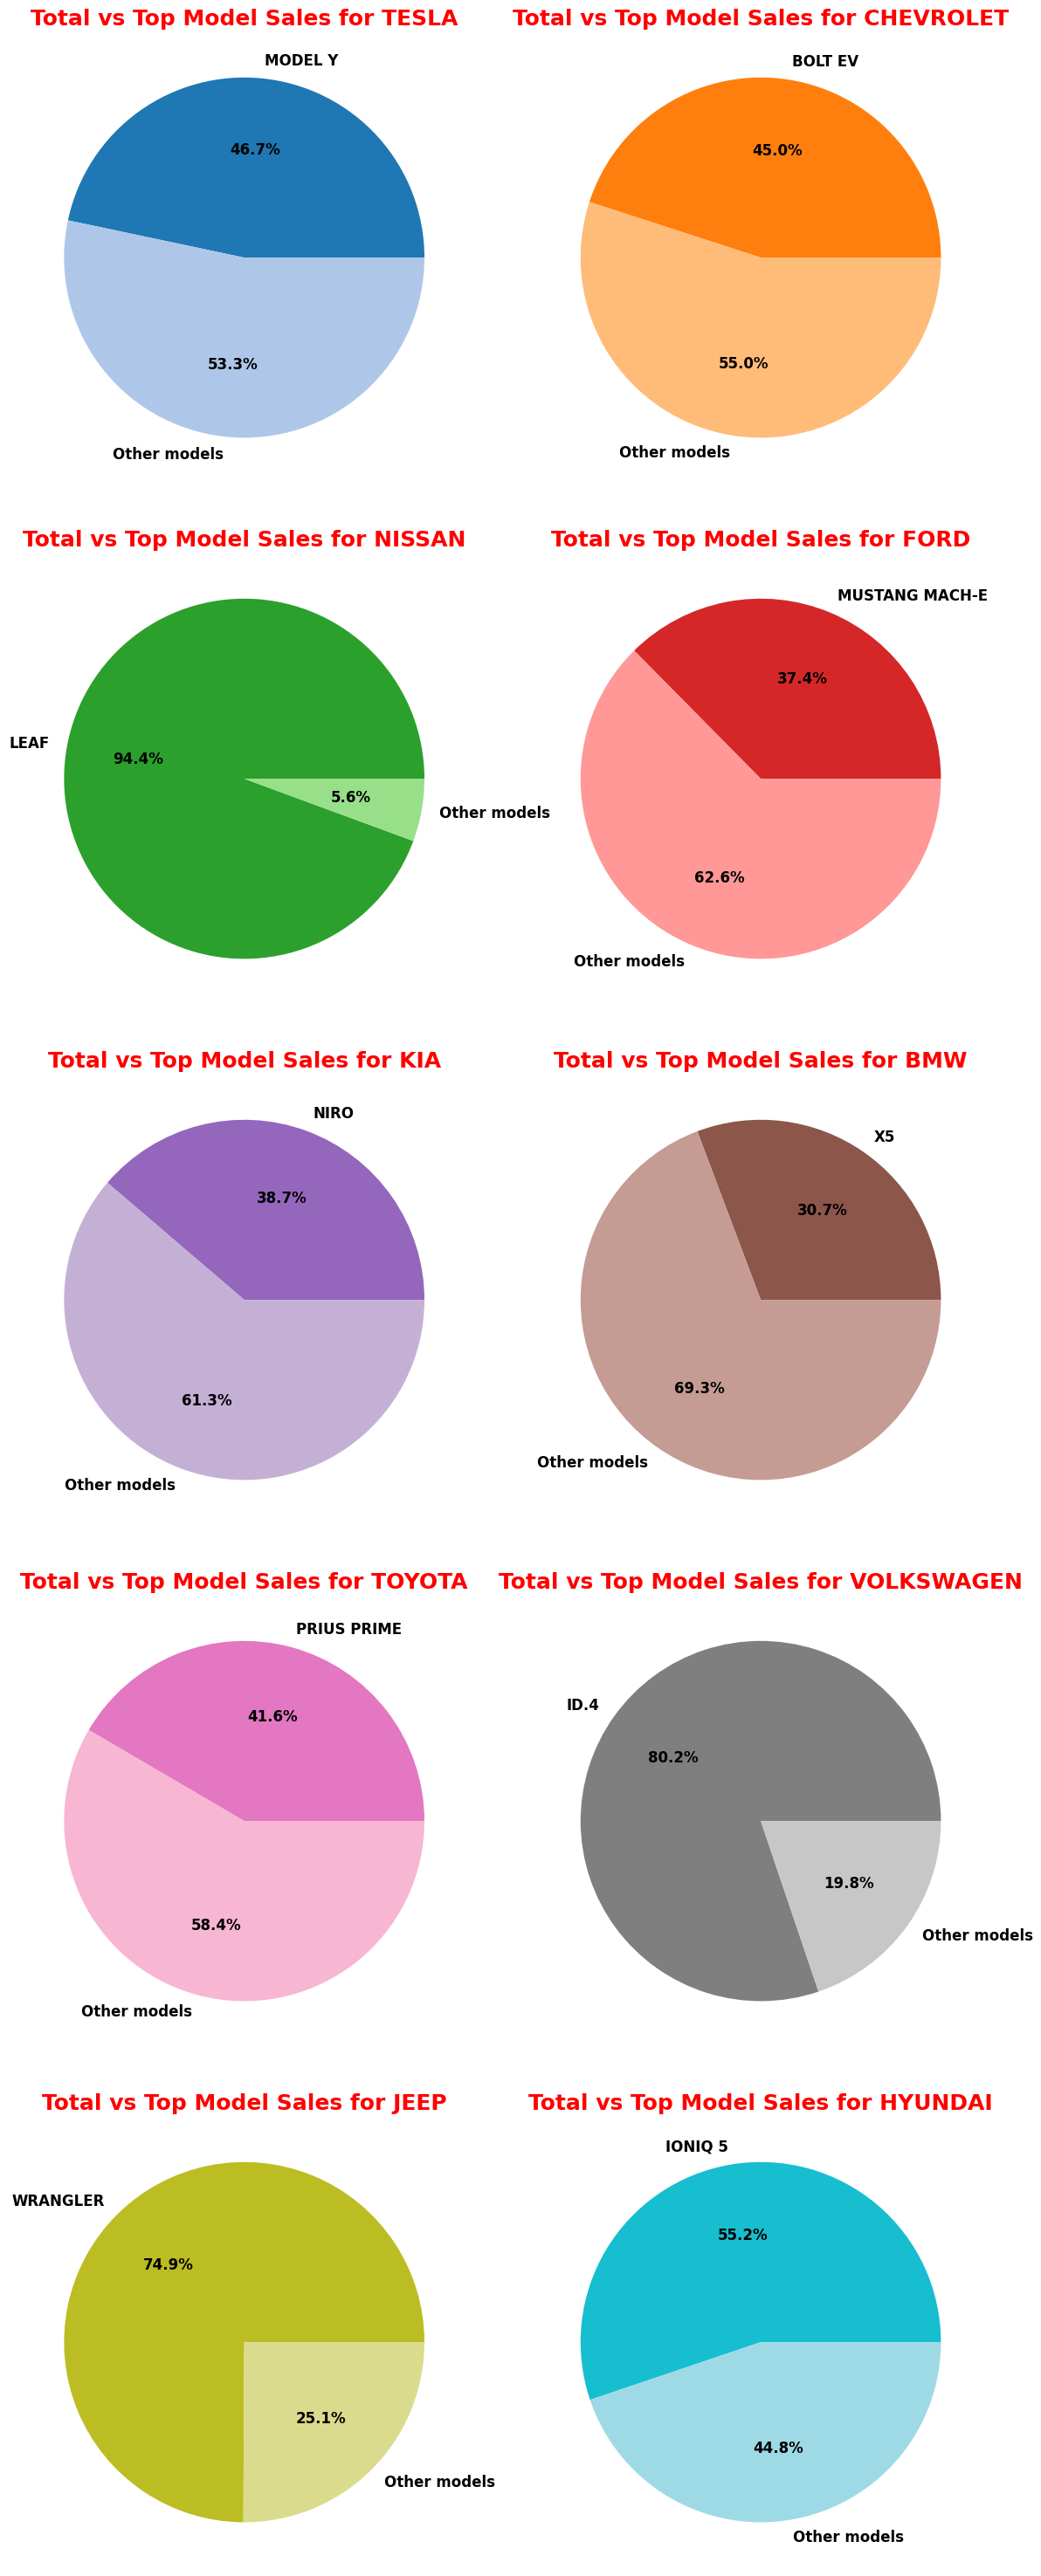

In [96]:
#define a colormap to generate distinctive colors
num_companies = len(top_companies)
cmap = cm.get_cmap('tab20', num_companies * 2) 
num_cols = 2  #two columns and rows for the plots
num_rows = (num_companies + 1) // num_cols  #calculate the necessary number of rows

plt.figure(figsize = (12, 6 * num_rows))

for idx, company in enumerate(top_companies):
    company_data = electric_vehicles[electric_vehicles['Make'] == company]
    total_sales = company_data.shape[0]
    model_sales_counts = company_data.groupby('Model').size().sort_values(ascending = False)
    top_selling_model = model_sales_counts.index[0]
    top_selling_model_count = model_sales_counts.iloc[0]

    sales_data = [top_selling_model_count, total_sales - top_selling_model_count]  #prepare the data for the pie chart
    labels = [top_selling_model, 'Other models']
    colors = [cmap(idx * 2), cmap(idx * 2 + 1)]  #select a pair of distinctive colors for each pie chart 

    #create the pie chart for total and top model sales 
    plt.subplot(num_rows, num_cols, idx + 1) 
    plt.pie(sales_data, labels = labels, autopct = '%1.1f%%', colors = colors, textprops = {'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
    plt.title(f'Total vs Top Model Sales for {company}', fontsize = 18, fontweight = 'bold', color = 'red')

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.tight_layout()
plt.show()

In [97]:
top_models_EVType = {
    'Company': [], 
    'Top Model': [], 
    'EV Type': []
}  #initialize a dictionary to store the results

for company in top_companies:
    company_data = electric_vehicles[electric_vehicles['Make'] == company]
    top_model_data = company_data.groupby('Model').size().sort_values(ascending = False)
    top_selling_model = top_model_data.index[0]
    top_model_count = top_model_data.iloc[0]
    
    top_model_info_df = company_data[company_data['Model'] == top_selling_model]  #get the electric vehicle type of the top selling model
    ev_type = top_model_info_df['Electric Vehicle Type'].iloc[0]
    
    top_models_EVType['Company'].append(company)
    top_models_EVType['Top Model'].append(top_selling_model)
    top_models_EVType['EV Type'].append(ev_type)

top_models_df = pd.DataFrame(top_models_EVType)  #create a dataframe from the results
print(top_models_df.to_string(index = False))  #print the dataframe without the index

   Company      Top Model                                EV Type
     TESLA        MODEL Y         Battery Electric Vehicle (BEV)
 CHEVROLET        BOLT EV         Battery Electric Vehicle (BEV)
    NISSAN           LEAF         Battery Electric Vehicle (BEV)
      FORD MUSTANG MACH-E         Battery Electric Vehicle (BEV)
       KIA           NIRO         Battery Electric Vehicle (BEV)
       BMW             X5 Plug-in Hybrid Electric Vehicle (PHEV)
    TOYOTA    PRIUS PRIME Plug-in Hybrid Electric Vehicle (PHEV)
VOLKSWAGEN           ID.4         Battery Electric Vehicle (BEV)
      JEEP       WRANGLER Plug-in Hybrid Electric Vehicle (PHEV)
   HYUNDAI        IONIQ 5         Battery Electric Vehicle (BEV)


**BEV:** pure electric vehicles, without an internal combustion engine

**PHEV:** hybrid vehicles that can run either electrically or on conventional fuel, as needed

Both types of vehicles are considered electric because they use electricity as one of the main sources of propulsion, but BEVs are fully electric while PHEVs are hybrid.

In [98]:
top_models_ER = {
    'Company': [], 
    'Top Model': [], 
    'Electric Range': []
}  #dictionary to store information about top models and their electric range

for company in top_companies: 
    company_data = electric_vehicles[electric_vehicles['Make'] == company]  #filter data for the current company
    top_model_data = company_data.groupby('Model').size().sort_values(ascending = False)  #find the model with the highest number of sales
    top_selling_model = top_model_data.index[0]
    
    top_model_info_df = company_data[company_data['Model'] == top_selling_model]  #get the electric range of the top-selling model
    top_model_range = top_model_info_df['Electric Range'].iloc[0]
    
    #store the information in the dictionary
    top_models_ER['Company'].append(company)
    top_models_ER['Top Model'].append(top_selling_model)
    top_models_ER['Electric Range'].append(top_model_range)

top_models_df = pd.DataFrame(top_models_ER)  #create a DataFrame from the results
print(top_models_df.to_string(index = False))

   Company      Top Model  Electric Range
     TESLA        MODEL Y             291
 CHEVROLET        BOLT EV             238
    NISSAN           LEAF              84
      FORD MUSTANG MACH-E               0
       KIA           NIRO             239
       BMW             X5              30
    TOYOTA    PRIUS PRIME              25
VOLKSWAGEN           ID.4               0
      JEEP       WRANGLER              22
   HYUNDAI        IONIQ 5               0


More precise details can be provided according to statistics found online:
- TESLA MODEL Y 'LONG RANGE' --> 291 (BEV)

- CHEVROLET BOLT EV 'STANDARD' --> 238 (BEV)

- NISSAN LEAF 'STANDARD' --> 150 (BEV)

- FORD MUSTANG MACH-E 'STANDARD RANGE' --> 230 (BEV)

- KIA NIRO 'STANDARD' --> 239 (BEV)

- BMW X5 --> 30 (PHEV)
- TOYOTA PRIUS PRIME 'STANDARD' --> 25 (PHEV)

- VOLKSWAGEN ID.4 'STANDARD RANGE' --> 250 (BEV)

- JEEP WRANGLER --> 22 (PHEV)

- HYUNDAI IONIQ 5 'STANDARD RANGE' --> 220 (BEV)

In general, newer vehicle models might be expected to have greater electric ranges due to technological advancements and market demands. However, this trend isn't guaranteed and can vary based on the model's specifics, manufacturer differences, and vehicle types. To accurately determine if this trend holds true, a statistical analysis of the correlation between model year and electric range would be necessary.

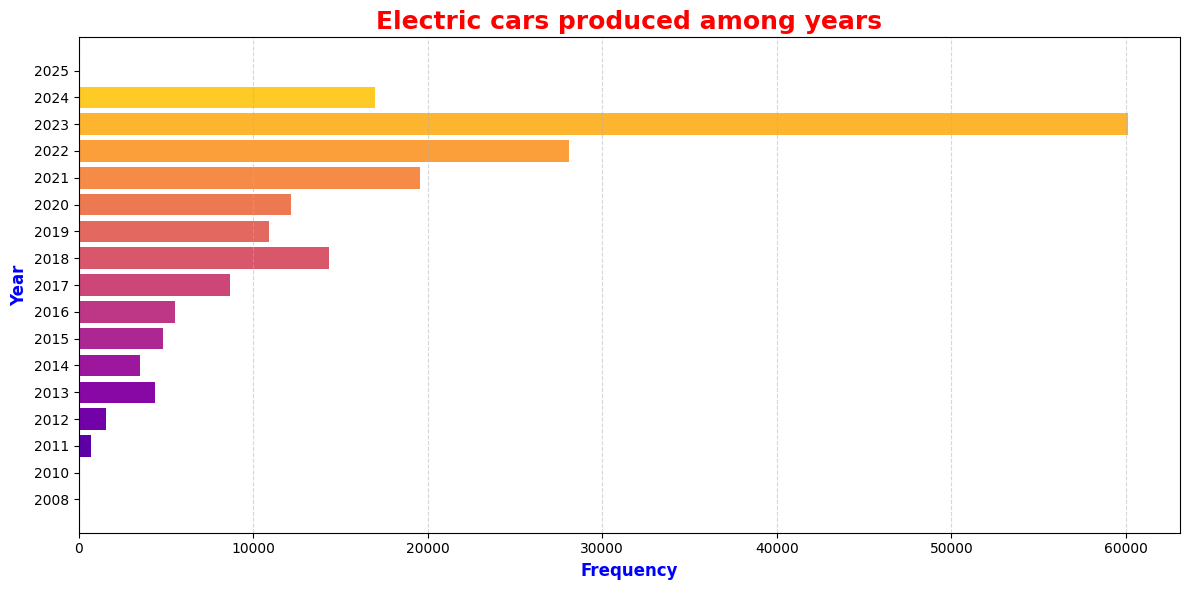

In [99]:
filtered_data = electric_vehicles[electric_vehicles['Model Year'] >= 2005]  #filter the dataframe to include only rows where 'Model Year' is 2005 or later
year_counts = filtered_data['Model Year'].value_counts().reset_index()  #count occurrences of each model year in the filtered data and reset index
year_counts.columns = ['Model Year', 'count']
year_counts = year_counts.sort_values(by='Model Year')
palette = sns.color_palette('plasma', len(year_counts))  #create a color palette

#create a horizontal bar chart
plt.figure(figsize = (12, 6))
bars = plt.barh(year_counts['Model Year'].astype(str), year_counts['count'], color = palette)
plt.title('Electric cars produced among years', fontsize = 18, fontweight = 'bold', color = 'red')
plt.xlabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.ylabel('Year', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

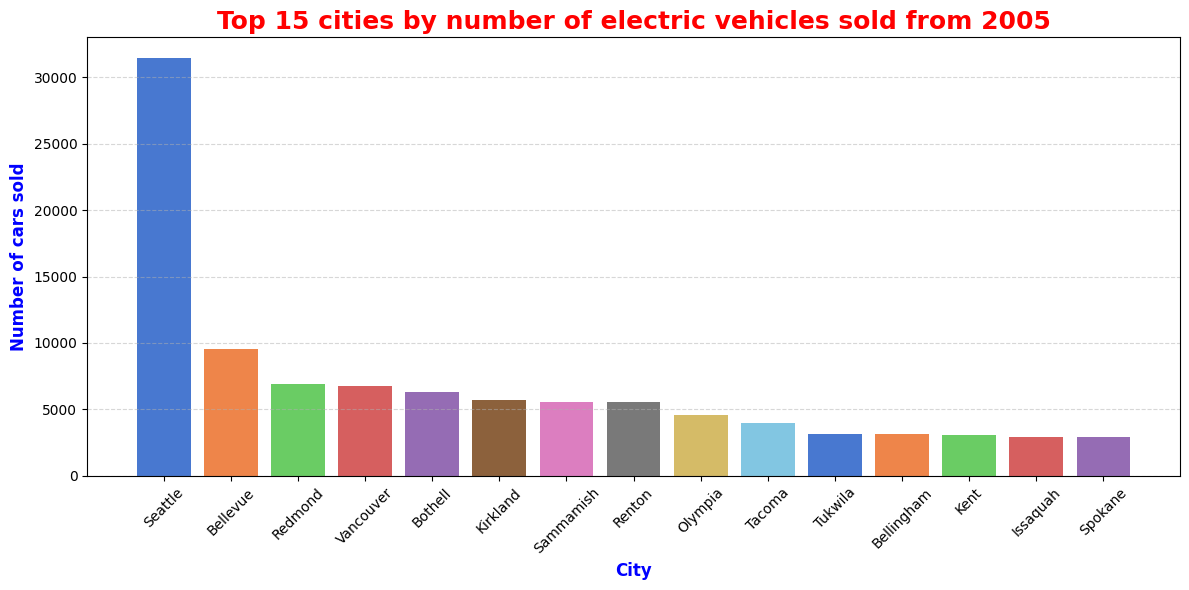

In [100]:
city_counts = filtered_data['City'].value_counts().reset_index()  #count occurrences of each city in the filtered data and reset index
city_counts.columns = ['City', 'Count']
city_counts = city_counts.sort_values(by = 'Count', ascending = False)
top_15_cities = city_counts.head(15)
palette = sns.color_palette('muted', len(top_15_cities))

#create a vertical bar chart
plt.figure(figsize = (12, 6))
bars = plt.bar(top_15_cities['City'], top_15_cities['Count'], color = palette)
plt.title('Top 15 cities by number of electric vehicles sold from 2005', fontsize = 18, fontweight = 'bold', color = 'red')
plt.xlabel('City', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.ylabel('Number of cars sold', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

 Model Year  Units Sold
       2020        2397
       2021        6830
       2022        7419
       2023       18973
       2024        3902


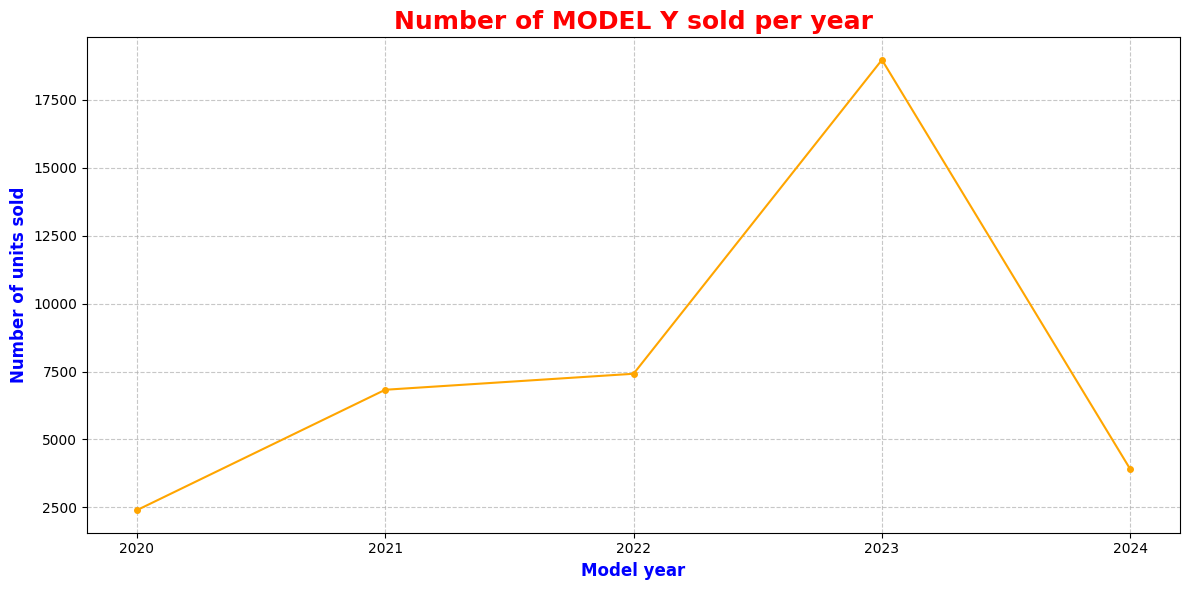

In [101]:
tesla_data = electric_vehicles[electric_vehicles['Make'] == 'TESLA']  #filter the data for Tesla models
tesla_top_model_data = tesla_data.groupby('Model').size().sort_values(ascending = False)  #find the top Tesla model
top_tesla_model = tesla_top_model_data.index[0]
top_tesla_model_data = tesla_data[tesla_data['Model'] == top_tesla_model]  #filter the data for the top model
tesla_yearly_sales = top_tesla_model_data.groupby('Model Year').size()  #count the number of units sold per year for the top model
tesla_sales_df = pd.DataFrame(tesla_yearly_sales).reset_index()  #convert the series to a dataframe for clearer printing
tesla_sales_df.columns = ['Model Year', 'Units Sold']
print(tesla_sales_df.to_string(index = False))  #print the dataframe without the index

#create a line chart
plt.figure(figsize = (12, 6))
plt.plot(tesla_yearly_sales.index, tesla_yearly_sales.values, color = '#FFA500', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_tesla_model} sold per year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of units sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(tesla_yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

In [102]:
tesla_years_of_interest = [2020, 2021, 2022, 2023, 2024]  #define the years of interest
tesla_city_sales = {'Year': [], 'City': [], 'Number of Sales': []}  #initialize a dictionary to store results

for year_tesla in tesla_years_of_interest:
    tesla_yearly_data = top_tesla_model_data[top_tesla_model_data['Model Year'] == year_tesla]  #filter data for the specific year
    tesla_city_sales_data = tesla_yearly_data.groupby('City').size().reset_index(name = 'Number of Sales')  #group by city and count sales
    tesla_top_city = tesla_city_sales_data.loc[tesla_city_sales_data['Number of Sales'].idxmax()]  #find the city with the highest sales
    
    #append results to the dictionary
    tesla_city_sales['Year'].append(year_tesla)
    tesla_city_sales['City'].append(tesla_top_city['City'])
    tesla_city_sales['Number of Sales'].append(tesla_top_city['Number of Sales'])

tesla_city_sales_df = pd.DataFrame(tesla_city_sales)  #create a DataFrame from the results
print(tesla_city_sales_df.to_string(index = False))

 Year    City  Number of Sales
 2020 Seattle              413
 2021 Seattle             1180
 2022 Seattle             1062
 2023 Seattle             2298
 2024 Seattle              507


 Model Year  Units Sold
       2017        1446
       2018         527
       2019        1080
       2020        1480
       2021         465
       2022         306
       2023        1140


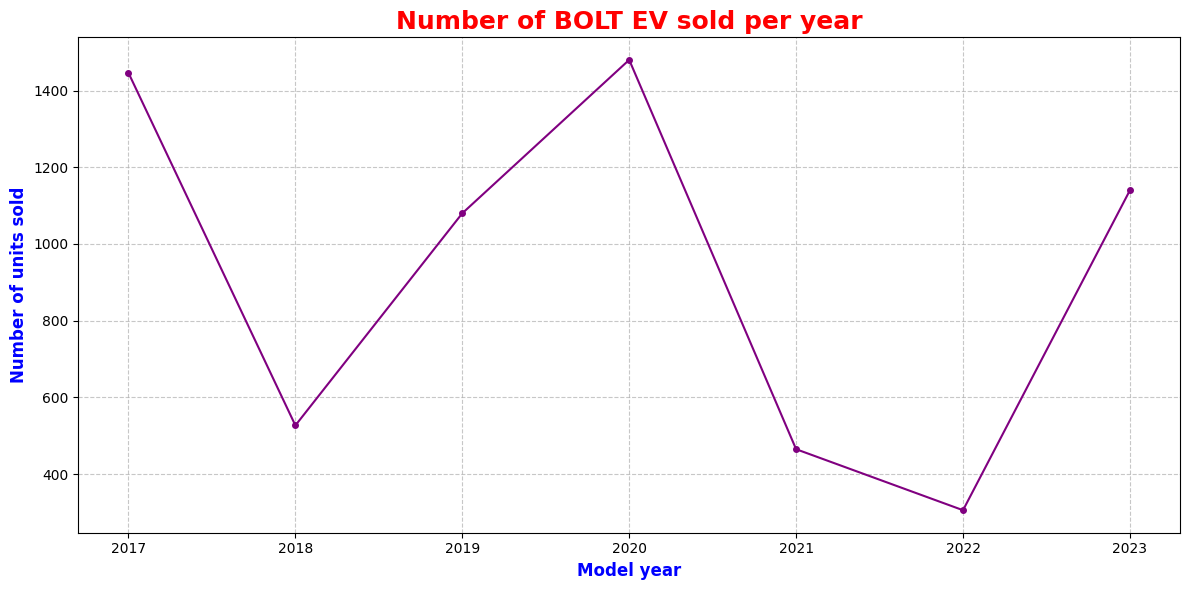

In [103]:
chevrolet_data = electric_vehicles[electric_vehicles['Make'] == 'CHEVROLET']  #filter the data for Chevrolet models
chevrolet_top_model_data = chevrolet_data.groupby('Model').size().sort_values(ascending = False)  #find the top Chevrolet model
top_chevrolet_model = chevrolet_top_model_data.index[0]
top_chevrolet_model_data = chevrolet_data[chevrolet_data['Model'] == top_chevrolet_model]  #filter the data for the top model
chevrolet_yearly_sales = top_chevrolet_model_data.groupby('Model Year').size()  #count the number of units sold per year for the top model
chevrolet_sales_df = pd.DataFrame(chevrolet_yearly_sales).reset_index()  #convert the series to a dataframe for clearer printing
chevrolet_sales_df.columns = ['Model Year', 'Units Sold']
print(chevrolet_sales_df.to_string(index = False))  #print the dataframe without the index

#create a line chart
plt.figure(figsize = (12, 6))
plt.plot(chevrolet_yearly_sales.index, chevrolet_yearly_sales.values, color = '#800080', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_chevrolet_model} sold per year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of units sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(chevrolet_yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

In [104]:
chevrolet_years_of_interest = [2017, 2018, 2019, 2020, 2021, 2022, 2023]  #define the years of interest
chevrolet_city_sales = {'Year': [], 'City': [], 'Number of Sales': []}  #initialize a dictionary to store results

for chevrolet_year in chevrolet_years_of_interest:
    chevrolet_yearly_data = top_chevrolet_model_data[top_chevrolet_model_data['Model Year'] == chevrolet_year]  #filter data for the specific year
    chevrolet_city_sales_data = chevrolet_yearly_data.groupby('City').size().reset_index(name = 'Number of Sales')  #group by city and count sales
    chevrolet_top_city = chevrolet_city_sales_data.loc[chevrolet_city_sales_data['Number of Sales'].idxmax()]  #find the city with the highest sales
    
    #append results to the dictionary
    chevrolet_city_sales['Year'].append(chevrolet_year)
    chevrolet_city_sales['City'].append(chevrolet_top_city['City'])
    chevrolet_city_sales['Number of Sales'].append(chevrolet_top_city['Number of Sales'])

chevrolet_city_sales_df = pd.DataFrame(chevrolet_city_sales)  #create a DataFrame from the results
print(chevrolet_city_sales_df.to_string(index = False))

 Year    City  Number of Sales
 2017 Seattle              268
 2018 Seattle              126
 2019 Seattle              247
 2020 Seattle              309
 2021 Seattle               85
 2022 Seattle               63
 2023 Seattle              252


 Model Year  Units Sold
       2011         652
       2012         556
       2013        1854
       2014         625
       2015        1803
       2016        1111
       2017         910
       2018        1197
       2019        1369
       2020         711
       2021         686
       2022        1069
       2023         743
       2024         153


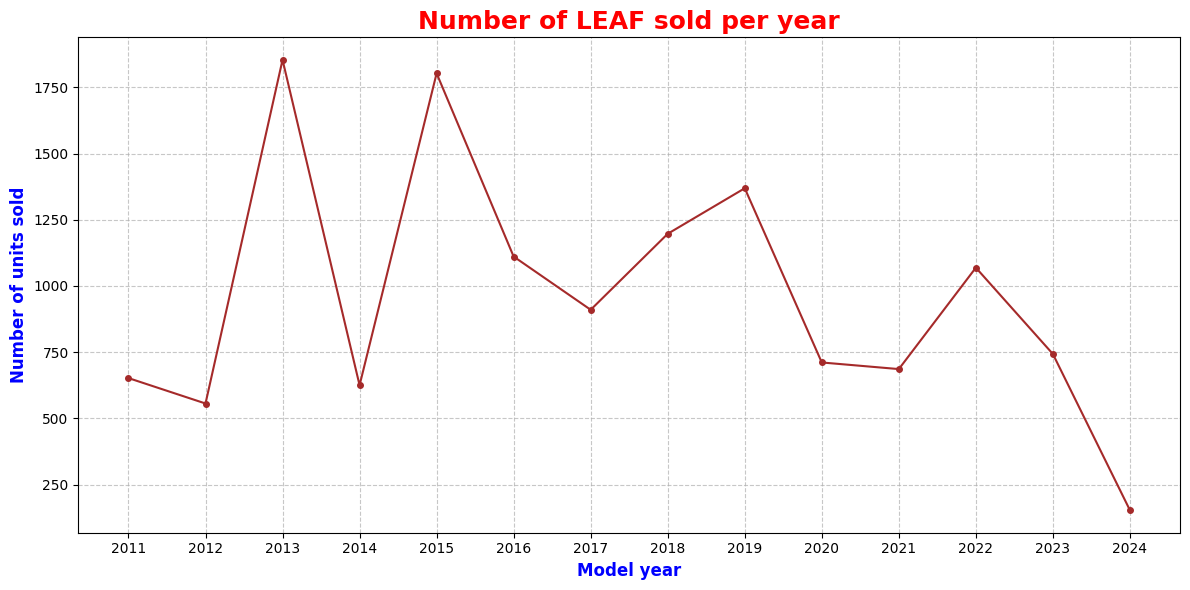

In [105]:
nissan_data = electric_vehicles[electric_vehicles['Make'] == 'NISSAN']  #filter the data for Nissan models
nissan_top_model_data = nissan_data.groupby('Model').size().sort_values(ascending = False)  #find the top Nissan model
top_nissan_model = nissan_top_model_data.index[0]
top_nissan_model_data = nissan_data[nissan_data['Model'] == top_nissan_model]  #filter the data for the top model
nissan_yearly_sales = top_nissan_model_data.groupby('Model Year').size()  #count the number of units sold per year for the top model
nissan_sales_df = pd.DataFrame(nissan_yearly_sales).reset_index()  #convert the series to a dataframe for clearer printing
nissan_sales_df.columns = ['Model Year', 'Units Sold']
print(nissan_sales_df.to_string(index = False))  #print the dataframe without the index

#create a line chart
plt.figure(figsize = (12, 6))
plt.plot(nissan_yearly_sales.index, nissan_yearly_sales.values, color = '#A52A2A', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_nissan_model} sold per year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of units sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(nissan_yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

In [106]:
nissan_years_of_interest = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]  #define the years of interest
nissan_city_sales = {'Year': [], 'City': [], 'Number of Sales': []}  #initialize a dictionary to store results

for nissan_year in nissan_years_of_interest:
    nissan_yearly_data = top_nissan_model_data[top_nissan_model_data['Model Year'] == nissan_year]  #filter data for the specific year
    nissan_city_sales_data = nissan_yearly_data.groupby('City').size().reset_index(name = 'Number of Sales')  #group by city and count sales
    nissan_top_city = nissan_city_sales_data.loc[nissan_city_sales_data['Number of Sales'].idxmax()]  #find the city with the highest sales
    
    #append results to the dictionary
    nissan_city_sales['Year'].append(nissan_year)
    nissan_city_sales['City'].append(nissan_top_city['City'])
    nissan_city_sales['Number of Sales'].append(nissan_top_city['Number of Sales'])

nissan_city_sales_df = pd.DataFrame(nissan_city_sales)  #create a dataframe from the results
print(nissan_city_sales_df.to_string(index = False))

 Year    City  Number of Sales
 2011 Seattle              135
 2012 Seattle               88
 2013 Seattle              337
 2014 Seattle              127
 2015 Seattle              366
 2016 Seattle              249
 2017 Seattle              212
 2018 Seattle              269
 2019 Seattle              268
 2020 Seattle              120
 2021 Seattle              160
 2022 Seattle              219
 2023 Seattle              140
 2024 Seattle               19


 Model Year  Units Sold
       2021         874
       2022        1042
       2023        1826
       2024          16


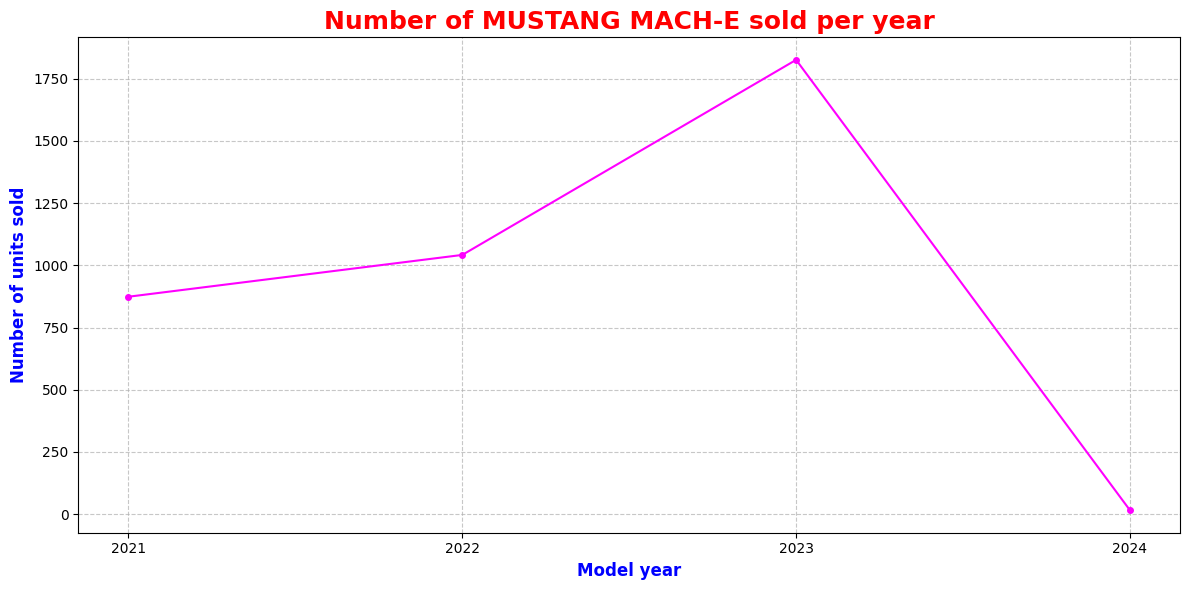

In [107]:
ford_data = electric_vehicles[electric_vehicles['Make'] == 'FORD']  #filter the data for Ford models
ford_top_model_data = ford_data.groupby('Model').size().sort_values(ascending = False)  #find the top Ford model
top_ford_model = ford_top_model_data.index[0]
top_ford_model_data = ford_data[ford_data['Model'] == top_ford_model]  #filter the data for the top model
ford_yearly_sales = top_ford_model_data.groupby('Model Year').size()  #count the number of units sold per year for the top model
ford_sales_df = pd.DataFrame(ford_yearly_sales).reset_index()  #convert the series to a dataframe for clearer printing
ford_sales_df.columns = ['Model Year', 'Units Sold']
print(ford_sales_df.to_string(index = False))  #print the dataframe without the index

#create a line chart
plt.figure(figsize = (12, 6))
plt.plot(ford_yearly_sales.index, ford_yearly_sales.values, color = '#FF00FF', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_ford_model} sold per year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of units sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(ford_yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

In [108]:
ford_years_of_interest = [2021, 2022, 2023, 2024]  #define the years of interest
ford_city_sales = {'Year': [], 'City': [], 'Number of Sales': []}  #initialize a dictionary to store results

for ford_year in ford_years_of_interest:
    ford_yearly_data = top_ford_model_data[top_ford_model_data['Model Year'] == ford_year]  #filter data for the specific year
    ford_city_sales_data = ford_yearly_data.groupby('City').size().reset_index(name = 'Number of Sales')  #group by city and count sales
    ford_top_city = ford_city_sales_data.loc[ford_city_sales_data['Number of Sales'].idxmax()]  #find the city with the highest sales
    
    #append results to the dictionary
    ford_city_sales['Year'].append(ford_year)
    ford_city_sales['City'].append(ford_top_city['City'])
    ford_city_sales['Number of Sales'].append(ford_top_city['Number of Sales'])

ford_city_sales_df = pd.DataFrame(ford_city_sales)  #create a DataFrame from the results
print(ford_city_sales_df.to_string(index = False))

 Year     City  Number of Sales
 2021  Seattle              100
 2022  Seattle              124
 2023  Seattle              239
 2024 Bellevue                2


 Model Year  Units Sold
       2018         194
       2019         674
       2020         520
       2021          80
       2022         686
       2023         852
       2024         352


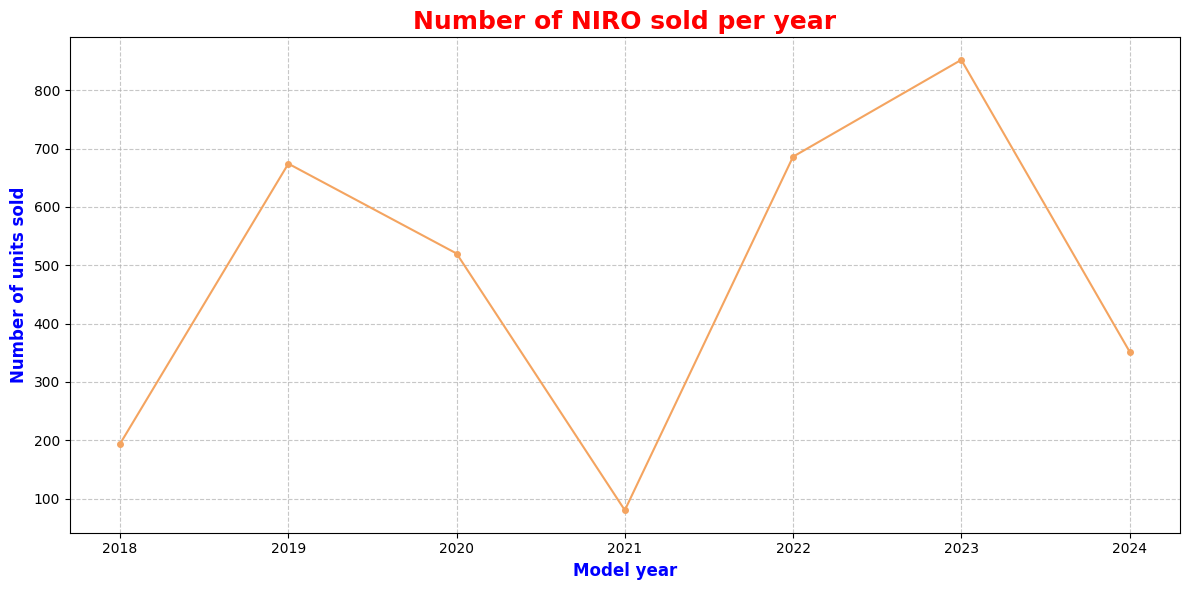

In [109]:
kia_data = electric_vehicles[electric_vehicles['Make'] == 'KIA']  #filter the data for Kia models
kia_top_model_data = kia_data.groupby('Model').size().sort_values(ascending = False)  #find the top Kia model
top_kia_model = kia_top_model_data.index[0]
top_kia_model_data = kia_data[kia_data['Model'] == top_kia_model]  #filter the data for the top model
kia_yearly_sales = top_kia_model_data.groupby('Model Year').size()  #count the number of units sold per year for the top model
kia_sales_df = pd.DataFrame(kia_yearly_sales).reset_index()  #convert the series to a dataframe for clearer printing
kia_sales_df.columns = ['Model Year', 'Units Sold']
print(kia_sales_df.to_string(index = False))  #print the dataframe without the index

#create a line chart
plt.figure(figsize = (12, 6))
plt.plot(kia_yearly_sales.index, kia_yearly_sales.values, color = '#F4A460', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_kia_model} sold per year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of units sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(kia_yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

In [110]:
kia_years_of_interest = [2018, 2019, 2020, 2021, 2022, 2023, 2024]  #define the years of interest
kia_city_sales = {'Year': [], 'City': [], 'Number of Sales': []}  #initialize a dictionary to store results

for kia_year in kia_years_of_interest:
    kia_yearly_data = top_kia_model_data[top_kia_model_data['Model Year'] == kia_year]  #filter data for the specific year
    kia_city_sales_data = kia_yearly_data.groupby('City').size().reset_index(name = 'Number of Sales')  #group by city and count sales
    kia_top_city = kia_city_sales_data.loc[kia_city_sales_data['Number of Sales'].idxmax()]  #find the city with the highest sales
    
    #append results to the dictionary
    kia_city_sales['Year'].append(kia_year)
    kia_city_sales['City'].append(kia_top_city['City'])
    kia_city_sales['Number of Sales'].append(kia_top_city['Number of Sales'])

kia_city_sales_df = pd.DataFrame(kia_city_sales)  #create a DataFrame from the results
print(kia_city_sales_df.to_string(index = False))

 Year    City  Number of Sales
 2018 Seattle               53
 2019 Seattle              146
 2020 Seattle              128
 2021 Seattle               19
 2022 Seattle              131
 2023 Seattle              164
 2024 Tukwila               97


 Model Year  Units Sold
       2016         162
       2017         170
       2018         177
       2021         314
       2022         588
       2023         550
       2024         495


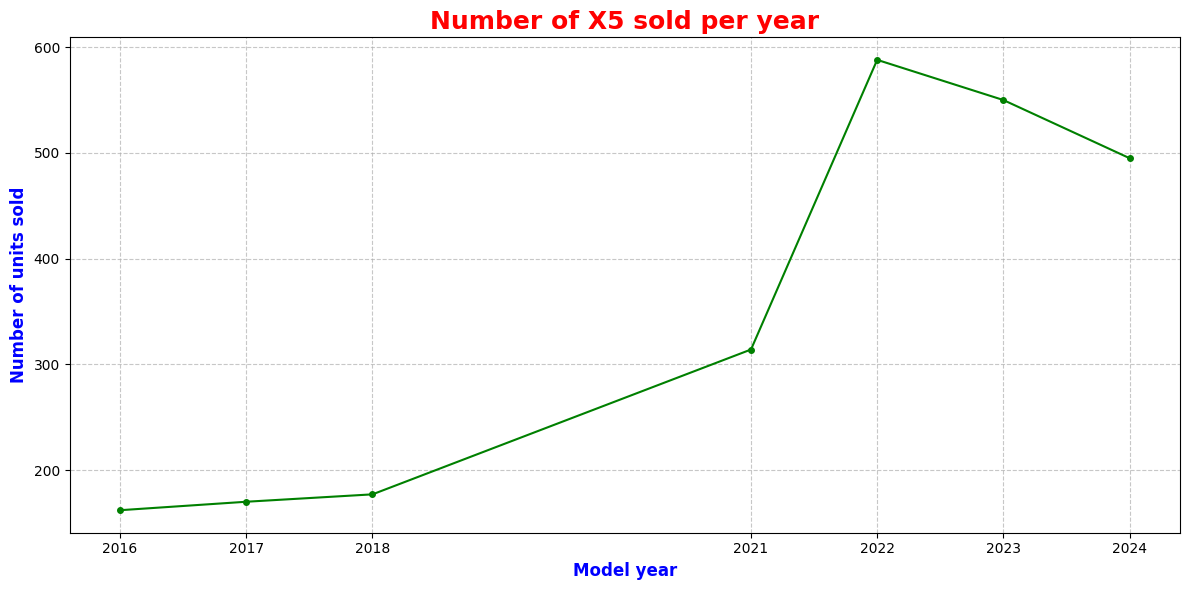

In [111]:
bmw_data = electric_vehicles[electric_vehicles['Make'] == 'BMW']  #filter the data for BMW models
bmw_top_model_data = bmw_data.groupby('Model').size().sort_values(ascending = False)  #find the top BMW model
top_bmw_model = bmw_top_model_data.index[0]
top_bmw_model_data = bmw_data[bmw_data['Model'] == top_bmw_model]  #filter the data for the top model
bmw_yearly_sales = top_bmw_model_data.groupby('Model Year').size()  #count the number of units sold per year for the top model
bmw_sales_df = pd.DataFrame(bmw_yearly_sales).reset_index()  #convert the series to a dataframe for clearer printing
bmw_sales_df.columns = ['Model Year', 'Units Sold']
print(bmw_sales_df.to_string(index = False))  #print the dataframe without the index

#create a line chart
plt.figure(figsize = (12, 6))
plt.plot(bmw_yearly_sales.index, bmw_yearly_sales.values, color = 'green', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_bmw_model} sold per year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of units sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(bmw_yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

In [112]:
bmw_years_of_interest = [2016, 2017, 2018, 2021, 2022, 2023, 2024]  #define the years of interest
bmw_city_sales = {'Year': [], 'City': [], 'Number of Sales': []}  #initialize a dictionary to store results

for bmw_year in bmw_years_of_interest:
    bmw_yearly_data = top_bmw_model_data[top_bmw_model_data['Model Year'] == bmw_year]  #filter data for the specific year
    bmw_city_sales_data = bmw_yearly_data.groupby('City').size().reset_index(name = 'Number of Sales')  #group by city and count sales
    bmw_top_city = bmw_city_sales_data.loc[bmw_city_sales_data['Number of Sales'].idxmax()]  #find the city with the highest sales
    
    #append results to the dictionary
    bmw_city_sales['Year'].append(bmw_year)
    bmw_city_sales['City'].append(bmw_top_city['City'])
    bmw_city_sales['Number of Sales'].append(bmw_top_city['Number of Sales'])

bmw_city_sales_df = pd.DataFrame(bmw_city_sales)  #create a DataFrame from the results
print(bmw_city_sales_df.to_string(index = False))

 Year    City  Number of Sales
 2016 Seattle               24
 2017 Seattle               37
 2018 Seattle               34
 2021 Seattle               67
 2022 Seattle               92
 2023 Seattle               78
 2024 Seattle               94


 Model Year  Units Sold
       2017         903
       2018         683
       2019         220
       2020         371
       2021         281
       2022         206
       2023          91
       2024         230


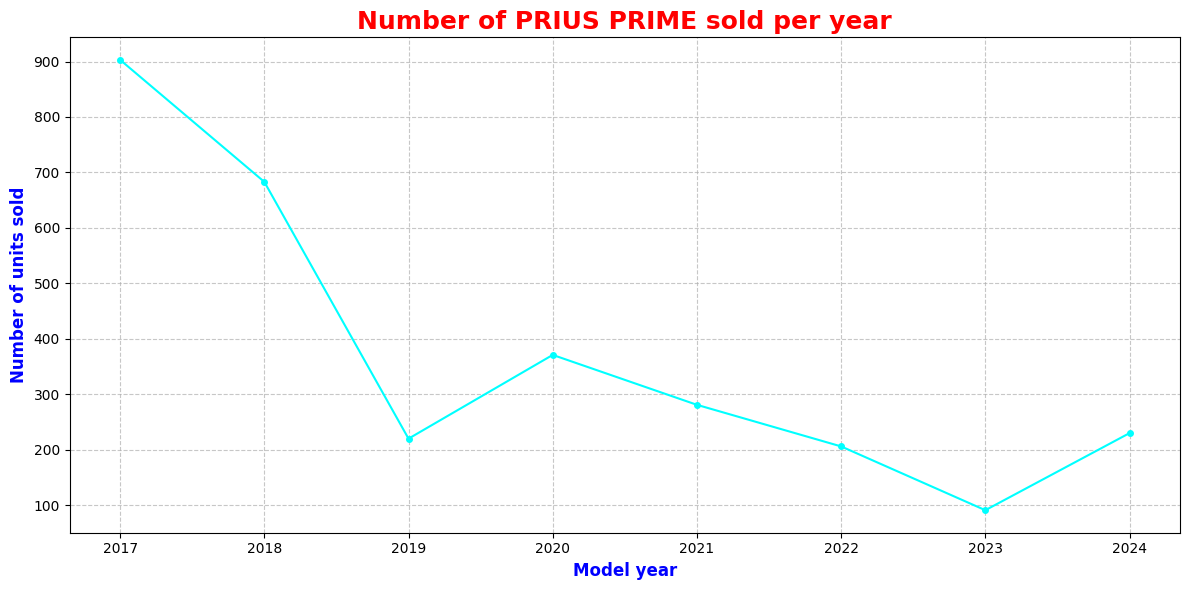

In [113]:
toyota_data = electric_vehicles[electric_vehicles['Make'] == 'TOYOTA']  #filter the data for Toyota models
toyota_top_model_data = toyota_data.groupby('Model').size().sort_values(ascending = False)  #find the top Toyota model
top_toyota_model = toyota_top_model_data.index[0]
top_toyota_model_data = toyota_data[toyota_data['Model'] == top_toyota_model]  #filter the data for the top model
toyota_yearly_sales = top_toyota_model_data.groupby('Model Year').size()  #count the number of units sold per year for the top model
toyota_sales_df = pd.DataFrame(toyota_yearly_sales).reset_index()  #convert the series to a dataframe for clearer printing
toyota_sales_df.columns = ['Model Year', 'Units Sold']
print(toyota_sales_df.to_string(index = False))  #print the dataframe without the index

#create a line chart
plt.figure(figsize = (12, 6))
plt.plot(toyota_yearly_sales.index, toyota_yearly_sales.values, color = '#00FFFF', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_toyota_model} sold per year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of units sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(toyota_yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

In [114]:
toyota_years_of_interest = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]  #define the years of interest
toyota_city_sales = {'Year': [], 'City': [], 'Number of Sales': []}  #initialize a dictionary to store results

for toyota_year in toyota_years_of_interest:
    toyota_yearly_data = top_toyota_model_data[top_toyota_model_data['Model Year'] == toyota_year]  #filter data for the specific year
    toyota_city_sales_data = toyota_yearly_data.groupby('City').size().reset_index(name = 'Number of Sales')  #group by city and count sales
    toyota_top_city = toyota_city_sales_data.loc[toyota_city_sales_data['Number of Sales'].idxmax()]  #find the city with the highest sales
    
    #append results to the dictionary
    toyota_city_sales['Year'].append(toyota_year)
    toyota_city_sales['City'].append(toyota_top_city['City'])
    toyota_city_sales['Number of Sales'].append(toyota_top_city['Number of Sales'])

toyota_city_sales_df = pd.DataFrame(toyota_city_sales)  #create a DataFrame from the results
print(toyota_city_sales_df.to_string(index = False))

 Year      City  Number of Sales
 2017   Seattle              122
 2018   Seattle              110
 2019   Seattle               29
 2020   Seattle               65
 2021   Seattle               42
 2022 Vancouver               32
 2023   Seattle               18
 2024   Seattle               35


 Model Year  Units Sold
       2021         994
       2022         725
       2023        2592
       2024          26


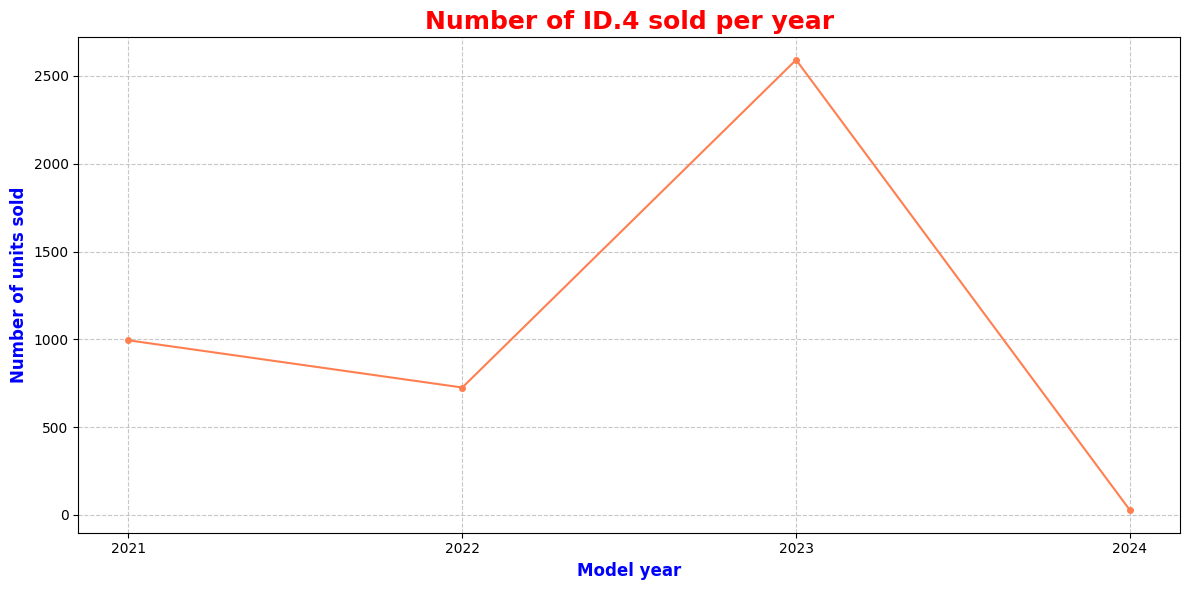

In [115]:
volkswagen_data = electric_vehicles[electric_vehicles['Make'] == 'VOLKSWAGEN']  #filter the data for Volkswagen models
volkswagen_top_model_data = volkswagen_data.groupby('Model').size().sort_values(ascending = False)  #find the top Volkswagen model
top_volkswagen_model = volkswagen_top_model_data.index[0]
top_volkswagen_model_data = volkswagen_data[volkswagen_data['Model'] == top_volkswagen_model]  #filter the data for the top model
volkswagen_yearly_sales = top_volkswagen_model_data.groupby('Model Year').size()  #count the number of units sold per year for the top model
volkswagen_sales_df = pd.DataFrame(volkswagen_yearly_sales).reset_index()  #convert the series to a dataframe for clearer printing
volkswagen_sales_df.columns = ['Model Year', 'Units Sold']
print(volkswagen_sales_df.to_string(index = False))  #print the dataframe without the index

#create a line chart
plt.figure(figsize = (12, 6))
plt.plot(volkswagen_yearly_sales.index, volkswagen_yearly_sales.values, color = '#FF7F50', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_volkswagen_model} sold per year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of units sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(volkswagen_yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

In [116]:
volkswagen_years_of_interest = [2021, 2022, 2023, 2024]  #define the years of interest
volkswagen_city_sales = {'Year': [], 'City': [], 'Number of Sales': []}  #initialize a dictionary to store results

for volkswagen_year in volkswagen_years_of_interest:
    volkswagen_yearly_data = top_volkswagen_model_data[top_volkswagen_model_data['Model Year'] == volkswagen_year]  #filter data for the specific year
    volkswagen_city_sales_data = volkswagen_yearly_data.groupby('City').size().reset_index(name = 'Number of Sales')  #group by city and count sales
    volkswagen_top_city = volkswagen_city_sales_data.loc[volkswagen_city_sales_data['Number of Sales'].idxmax()]  #find the city with the highest sales
    
    #append results to the dictionary
    volkswagen_city_sales['Year'].append(volkswagen_year)
    volkswagen_city_sales['City'].append(volkswagen_top_city['City'])
    volkswagen_city_sales['Number of Sales'].append(volkswagen_top_city['Number of Sales'])

volkswagen_city_sales_df = pd.DataFrame(volkswagen_city_sales)  #create a DataFrame from the results
print(volkswagen_city_sales_df.to_string(index = False))

 Year    City  Number of Sales
 2021 Seattle              221
 2022 Seattle              176
 2023 Seattle              559
 2024 Seattle                5


 Model Year  Units Sold
       2021         602
       2022         489
       2023        1462
       2024        1190


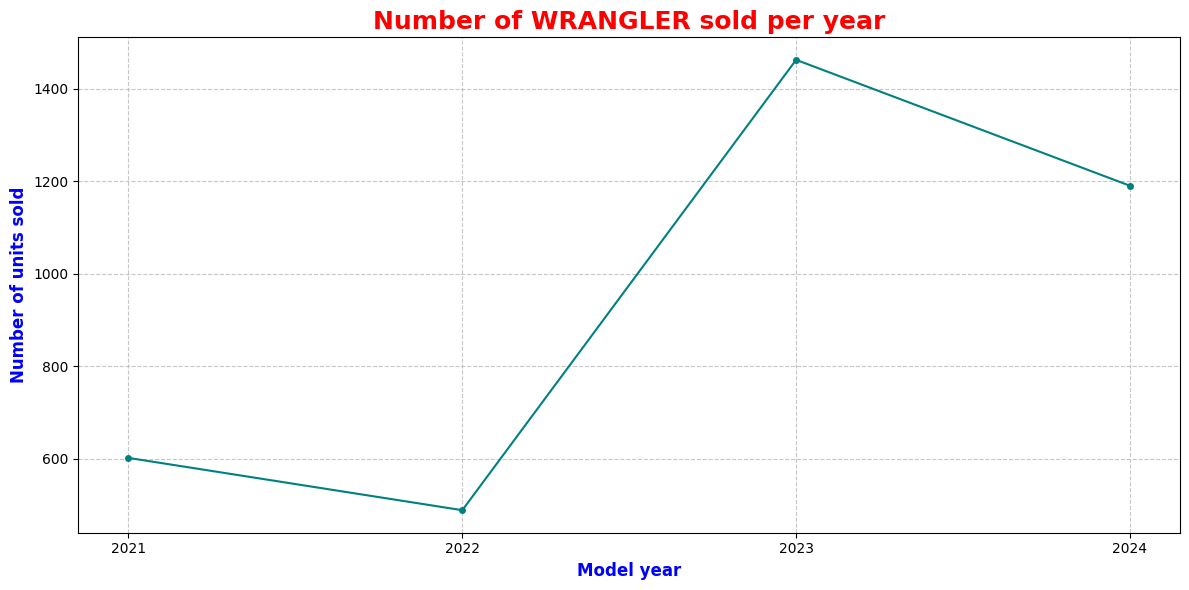

In [117]:
jeep_data = electric_vehicles[electric_vehicles['Make'] == 'JEEP']  #filter the data for Jeep models
jeep_top_model_data = jeep_data.groupby('Model').size().sort_values(ascending = False)  #find the top Jeep model
top_jeep_model = jeep_top_model_data.index[0]
top_jeep_model_data = jeep_data[jeep_data['Model'] == top_jeep_model]  #filter the data for the top model
jeep_yearly_sales = top_jeep_model_data.groupby('Model Year').size()  #count the number of units sold per year for the top model
jeep_sales_df = pd.DataFrame(jeep_yearly_sales).reset_index()  #convert the series to a dataframe for clearer printing
jeep_sales_df.columns = ['Model Year', 'Units Sold']
print(jeep_sales_df.to_string(index = False))  #print the dataframe without the index

#create a line chart
plt.figure(figsize = (12, 6))
plt.plot(jeep_yearly_sales.index, jeep_yearly_sales.values, color = '#008080', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_jeep_model} sold per year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of units sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(jeep_yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

In [118]:
jeep_years_of_interest = [2021, 2022, 2023, 2024]  #define the years of interest
jeep_city_sales = {'Year': [], 'City': [], 'Number of Sales': []}  #initialize a dictionary to store results

for jeep_year in jeep_years_of_interest:
    jeep_yearly_data = top_jeep_model_data[top_jeep_model_data['Model Year'] == jeep_year]  #filter data for the specific year
    jeep_city_sales_data = jeep_yearly_data.groupby('City').size().reset_index(name = 'Number of Sales')  #group by city and count sales
    jeep_top_city = jeep_city_sales_data.loc[jeep_city_sales_data['Number of Sales'].idxmax()]  #find the city with the highest sales
    
    #append results to the dictionary
    jeep_city_sales['Year'].append(jeep_year)
    jeep_city_sales['City'].append(jeep_top_city['City'])
    jeep_city_sales['Number of Sales'].append(jeep_top_city['Number of Sales'])

jeep_city_sales_df = pd.DataFrame(jeep_city_sales)  #create a DataFrame from the results
print(jeep_city_sales_df.to_string(index = False))

 Year    City  Number of Sales
 2021 Seattle               53
 2022 Seattle               42
 2023 Tukwila              565
 2024  Renton              137


In [119]:
hyundai_data = electric_vehicles[electric_vehicles['Make'] == 'HYUNDAI']  #filter the data for Hyundai models
hyundai_top_model_data = hyundai_data.groupby('Model').size().sort_values(ascending = False)  #find the top Hyundai model
top_hyundai_model = hyundai_top_model_data.index[0]
top_hyundai_model_data = hyundai_data[hyundai_data['Model'] == top_hyundai_model]  #filter the data for the top model
hyundai_yearly_sales = top_hyundai_model_data.groupby('Model Year').size()  #count the number of units sold per year for the top model
hyundai_sales_df = pd.DataFrame(hyundai_yearly_sales).reset_index()  #convert the series to a dataframe for clearer printing
hyundai_sales_df.columns = ['Model Year', 'Units Sold']
print(hyundai_sales_df.to_string(index = False))  #print the dataframe without the index

 Model Year  Units Sold
       2022         423
       2023        1865
       2024         459


 Model Year  Units Sold
       2022         423
       2023        1865
       2024         459


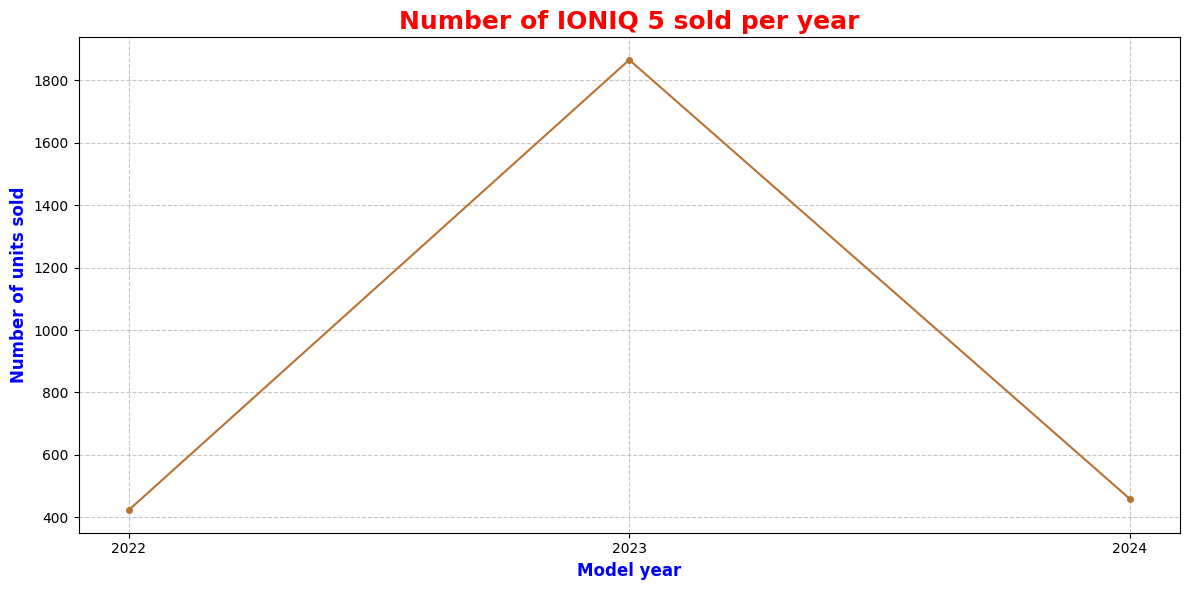

In [120]:
hyundai_data = electric_vehicles[electric_vehicles['Make'] == 'HYUNDAI']  #filter the data for Hyundai models
hyundai_top_model_data = hyundai_data.groupby('Model').size().sort_values(ascending = False)  #find the top Hyundai model
top_hyundai_model = hyundai_top_model_data.index[0]
top_hyundai_model_data = hyundai_data[hyundai_data['Model'] == top_hyundai_model]  #filter the data for the top model
hyundai_yearly_sales = top_hyundai_model_data.groupby('Model Year').size()  #count the number of units sold per year for the top model
hyundai_sales_df = pd.DataFrame(hyundai_yearly_sales).reset_index()  #convert the series to a dataframe for clearer printing
hyundai_sales_df.columns = ['Model Year', 'Units Sold']
print(hyundai_sales_df.to_string(index = False))  #print the dataframe without the index

#create a line chart
plt.figure(figsize = (12, 6))
plt.plot(hyundai_yearly_sales.index, hyundai_yearly_sales.values, color = '#B87333', linestyle = '-', marker = 'o', markersize = 4)
plt.title(f'Number of {top_hyundai_model} sold per year', fontweight = 'bold', fontsize = 18, color = 'red')
plt.xlabel('Model year', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.ylabel('Number of units sold', fontweight = 'bold', color = 'blue', fontsize = 12)
plt.xticks(hyundai_yearly_sales.index, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

In [121]:
hyundai_years_of_interest = [2022, 2023, 2024]  #define the years of interest
hyundai_city_sales = {'Year': [], 'City': [], 'Number of Sales': []}  #initialize a dictionary to store results

for hyundai_year in hyundai_years_of_interest:
    hyundai_yearly_data = top_hyundai_model_data[top_hyundai_model_data['Model Year'] == hyundai_year]  #filter data for the specific year
    hyundai_city_sales_data = hyundai_yearly_data.groupby('City').size().reset_index(name = 'Number of Sales')  #group by city and count sales
    hyundai_top_city = hyundai_city_sales_data.loc[hyundai_city_sales_data['Number of Sales'].idxmax()]  #find the city with the highest sales
    
    #append results to the dictionary
    hyundai_city_sales['Year'].append(hyundai_year)
    hyundai_city_sales['City'].append(hyundai_top_city['City'])
    hyundai_city_sales['Number of Sales'].append(hyundai_top_city['Number of Sales'])

hyundai_city_sales_df = pd.DataFrame(hyundai_city_sales)  #create a DataFrame from the results
print(hyundai_city_sales_df.to_string(index = False))

 Year    City  Number of Sales
 2022 Seattle              103
 2023 Seattle              482
 2024 Seattle              101


In the first half of 2024, sales of electric cars in the United States appear to have declined. This may have been influenced by reduced tax incentives, rising prices, and problems in the supply chain. Economic uncertainty and inflation may also have limited consumer spending. In addition, an inadequate charging network and the emergence of new technologies may have contributed to the decline. These factors combined could explain the decline in sales and the resulting few purchases made in the first half of this year.

Now, let's see some correlations. 

In [122]:
electric_vehicles_corr = electric_vehicles.corr(numeric_only = True)
electric_vehicles_corr

,Model Year,Electric Range
Model Year,1.00000,-0.49169
Electric Range,-0.49169,1.00000


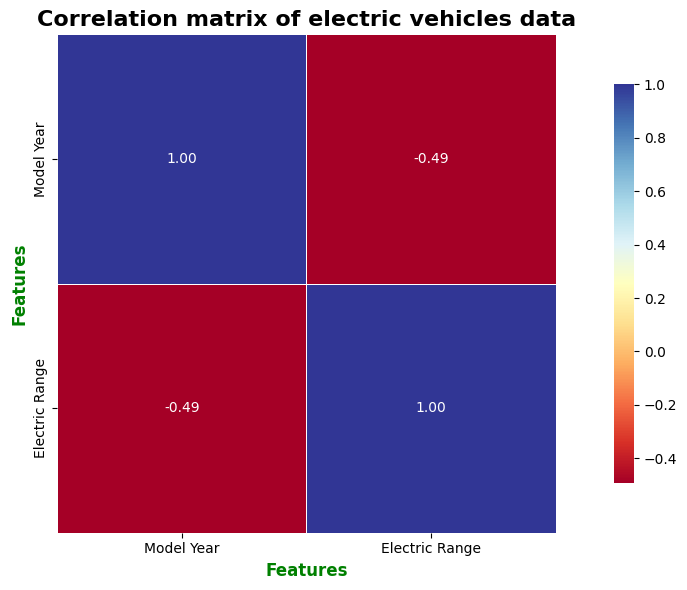

In [123]:
plt.figure(figsize = (12, 6))
sns.heatmap(electric_vehicles_corr, annot = True, cmap = "RdYlBu", fmt = ".2f", linewidths = 0.5, square = True, cbar_kws = {"shrink": 0.8})
plt.title('Correlation matrix of electric vehicles data', fontsize = 16, fontweight = 'bold', color = 'black')
plt.xlabel('Features', fontsize = 12, fontweight = 'bold', color = 'green')
plt.ylabel('Features', fontsize = 12, fontweight = 'bold', color = 'green')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.tight_layout()
plt.show()

In [124]:
filtered_data1 = electric_vehicles[(electric_vehicles['Model Year'] >= 2005) & (electric_vehicles['Electric Range'].notna())]  #filter the data to include only models from 2005 onwards and only with available electric range (not NaN)
correlation1 = filtered_data1[['Model Year', 'Electric Range']].corr().iloc[0, 1]  #calculate the correlation between 'Model Year' and 'Electric Range'
print(f'The correlation between model year (from 2005) and electric range is {correlation1:.2f}')

The correlation between model year (from 2005) and electric range is -0.49


In [125]:
filtered_data2 = electric_vehicles[(electric_vehicles['Model Year'] >= 2020) & (electric_vehicles['Model Year'] <= 2025) & (electric_vehicles['Electric Range'].notna())]  #filter the data to include only models from 2020 to 2025 and only with available electric range (not NaN)
correlation2 = filtered_data2[['Model Year', 'Electric Range']].corr().iloc[0, 1]  #calculate the correlation between 'Model Year' and 'Electric Range'
print(f'The correlation between model year and electric range (years 2020-2025) is {correlation2:.2f}')

The correlation between model year and electric range (years 2020-2025) is -0.58


A negative correlation of -0.58 between 'Model Year' and 'Electric Range' related to the last 5 years, may seem weird, but several factors can explain it. Manufacturers may focus on features other than range, such as performance or connectivity. Diversification of models and possible discontinuation of those with high range may negatively affect the correlation.  In addition, a limited or unrepresentative data sample may skew the results. A drop in sales or market slowdown may lead manufacturers to reduce the supply of models with high autonomy. In summary, negative correlation is the result of various technological, strategic, and market factors.

**PART 2: Find a model that explains the data.**

For this part you can use any tool you are familiar with, be it statistical methods, machine learning or even deep learning.

Possible ideas:

- regression model if you are trying to predict continuous values
- classification model when you have discrete and finite labels
- clustering if you want to find underlying structures of data, without prior information

In [126]:
#import libraries 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [127]:
x = electric_vehicles['Model Year'].to_numpy().reshape(-1, 1)
print(len(x))
print(x)

191403
[[2019]
 [2024]
 [2015]
 ...
 [2024]
 [2022]
 [2023]]


In [128]:
y = electric_vehicles['Electric Range'].to_numpy().reshape(-1, 1)
print(len(y))
print(y)

191403
[[270]
 [ 20]
 [ 84]
 ...
 [  0]
 [  0]
 [  0]]


In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0) 

In [130]:
ro_scaler = RobustScaler()
x_train_scaled = ro_scaler.fit_transform(x_train)
x_test_scaled = ro_scaler.fit_transform(x_test)

In [131]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [132]:
y_pred = model.predict(x_test_scaled)
print(len(y_pred))
y_pred

57421


array([[ 22.13151417],
       [ 22.13151417],
       [125.8695815 ],
       ...,
       [ 96.23013369],
       [ 22.13151417],
       [125.8695815 ]])

In [133]:
score = model.score(x_test_scaled, y_test)
print("Coefficient of determination (R-squared):", score)

Coefficient of determination (R-squared): 0.24277313541175172


In [134]:
slope = model.coef_
print('Coefficients:', slope)

Coefficients: [[-59.27889562]]


In [135]:
intercept = model.intercept_
print('Intercepts:', intercept)

Intercepts: [36.95123807]


In [136]:
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination (R^2):', r2)

Coefficient of determination (R^2): 0.24277313541175172


In [137]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE):', mean_squared_error(y_test, y_pred))
print('Coefficient of determiantion (R^2):', r2)

Coefficients: [[-59.27889562]]
Intercept: [36.95123807]
Mean squared error (MSE): 6120.627118467571
Coefficient of determiantion (R^2): 0.24277313541175172


In [138]:
mse = mean_squared_error(y_test, y_pred)
target_variance = np.var(y_test)
mse_to_variance_ratio = mse / target_variance

print("MSE to Variance Ratio:", mse_to_variance_ratio)

MSE to Variance Ratio: 0.7572268645882483


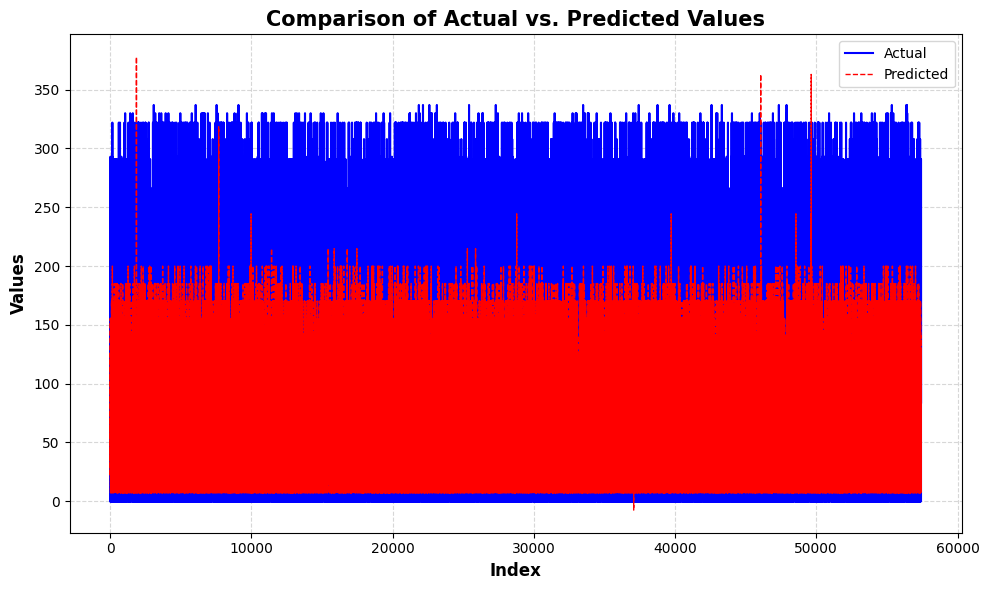

In [139]:
plt.figure(figsize = (10, 6))
plt.plot(y_test, color = 'blue', linewidth = 1.5, label = 'Actual')
plt.plot(y_pred, linestyle = '--', color = 'red', linewidth = 1, label = 'Predicted')
plt.xlabel('Index', fontsize = 12, fontweight = 'bold', color = 'black')
plt.ylabel('Values', fontsize = 12, fontweight = 'bold', color = 'black')
plt.title('Comparison of Actual vs. Predicted Values', fontsize = 15, fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 10, color = 'black')
plt.yticks(fontsize = 10, color = 'black')
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.legend()

plt.tight_layout()
plt.show()

In [140]:
intercept = model.intercept_[0]
slope = model.coef_[0][0]

print("Regression line equation:")
print('Y = {:.2f} + {:.3f} * X'.format(intercept, slope))

Regression line equation:
Y = 36.95 + -59.279 * X


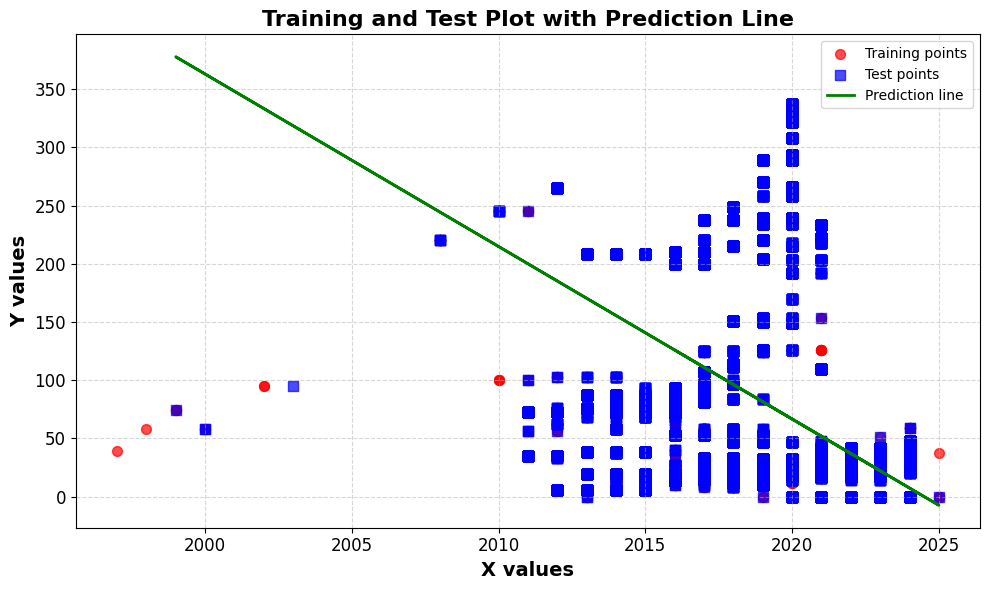

In [141]:
plt.figure(figsize=(10, 6))
plt.title('Training and Test Plot with Prediction Line', fontsize = 16, fontweight = 'bold', color = 'black')
plt.scatter(x_train, y_train, label = 'Training points', color = 'red', marker = 'o', s = 50, alpha = 0.7)
plt.scatter(x_test, y_test, label = 'Test points', color = 'blue', marker = 's', s = 50, alpha = 0.7)
plt.plot(x_test, y_pred, label = 'Prediction line', color = 'green', linewidth = 2)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.xlabel('X values', fontsize = 14, fontweight = 'bold', color = 'black')
plt.ylabel('Y values', fontsize = 14, fontweight = 'bold', color = 'black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

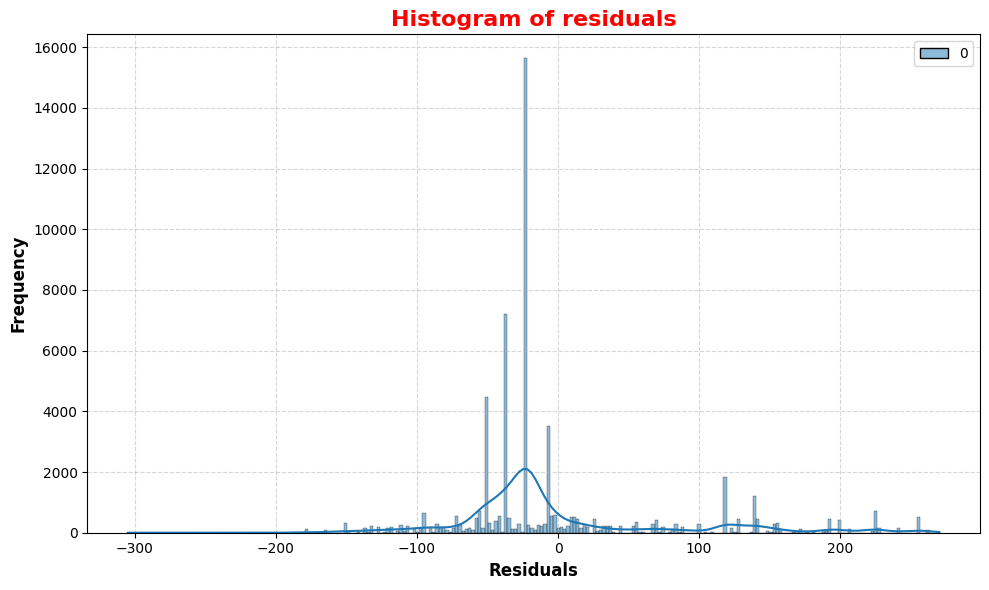

In [142]:
residuals = y_test - y_pred
plt.figure(figsize = (10,6))
sns.histplot(residuals, kde = True, color = 'skyblue')
plt.title('Histogram of residuals', fontsize = 16, fontweight = 'bold', color='red')
plt.xlabel('Residuals', fontsize = 12, fontweight = 'bold', color = 'black')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontsize = 10, color = 'black')
plt.yticks(fontsize = 10, color = 'black')
plt.grid(True, linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

In [143]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler